In [1]:
import numpy as np
from results_L_4_1 import results as results_4 
from results_L_5_550000_1 import results as results_5
from results_L_6_1 import results as results_6
from results_L_7_1 import results as results_7
from results_L_8_1 import results as results_8

from matplotlib.pyplot import *

In [2]:
results = [results_4, results_5, results_6, results_7, results_8]
maxiter = [450_000, 550_000, 45_000, 13_000, 1_600]
first_L = 4

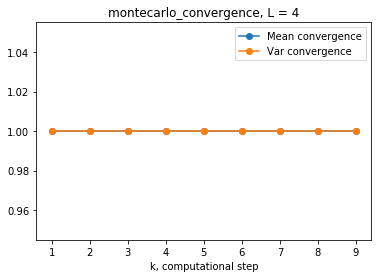

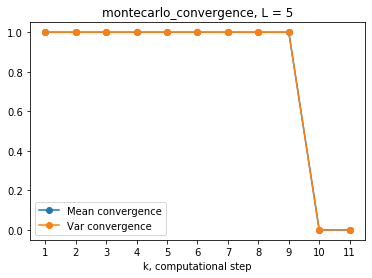

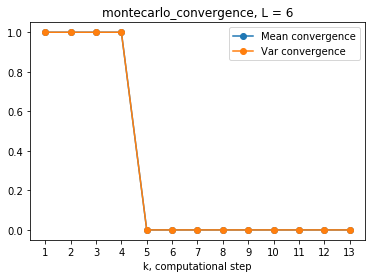

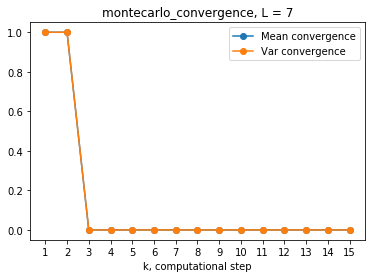

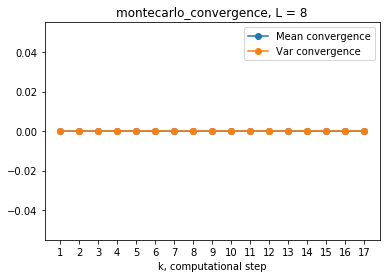

In [3]:
for i in range(5):
    interesting = results[i]
    x = range(1,2*(i+first_L)+2)
    plot(x, [interesting[k][0][0] for k in range(len(interesting))], "-o", label="Mean convergence")
    plot(x, [interesting[k][0][1] for k in range(len(interesting))], "-o", label="Var convergence")
    legend()
    xlabel('k, computational step')
    title('montecarlo_convergence, L = ' + str(i+first_L))
    xticks(x)
    show()

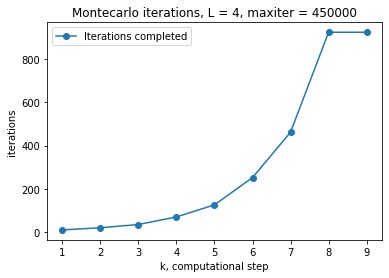

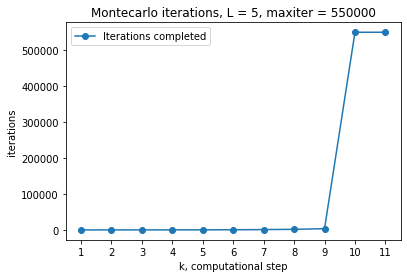

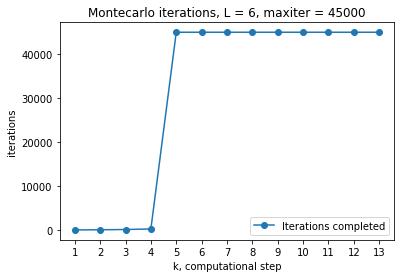

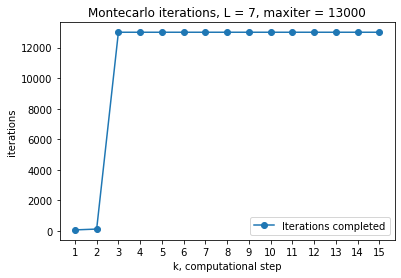

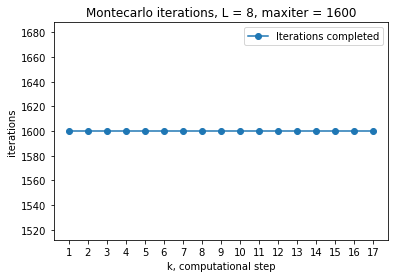

In [4]:
for i in range(5):
    interesting = results[i]
    x = range(1,2*(i+first_L)+2)
    plot(x, [len(interesting[k][1]) for k in range(len(interesting))], "-o", label="Iterations completed")
    legend()
    xlabel('k, computational step')
    ylabel('iterations')
    title('Montecarlo iterations, L = '+ str(i+first_L)+ ', maxiter = ' + str(maxiter[i]))
    xticks(x)
    #savefig("iteration_montecarlo_convergence_L="+str(i+5), dpi=300)    
    show()

## Estimate convergence

Text(0, 0.5, 'log2(iterations)')

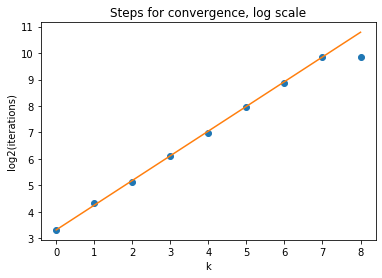

In [87]:
L = 4
first_L = 4
max_k = 2 * L + 1

first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()
if first_non_convergence: first_non_convergence = first_non_convergence[0]
else: first_non_convergence = -1


log_iter = np.log2([len(results[L-first_L][k][1]) for k in range(len(results[L-first_L]))])
plot(range(len(log_iter)), log_iter, 'o')
m = np.mean(np.diff(log_iter[:first_non_convergence]))
q = log_iter[0]
x = np.array(range(max_k))
plot(x, m * x + q)
title("Steps for convergence, log scale")
xlabel("k")
ylabel("log2(iterations)")
#savefig("iterations_convergence_L_5.png", dpi=300)
#print(2 **(m * 10 + q))

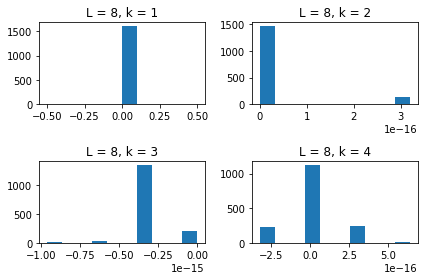

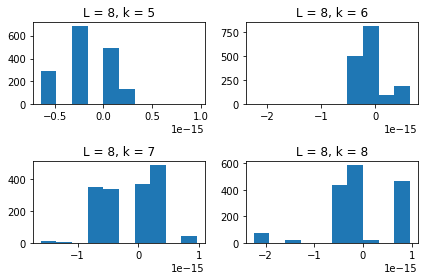

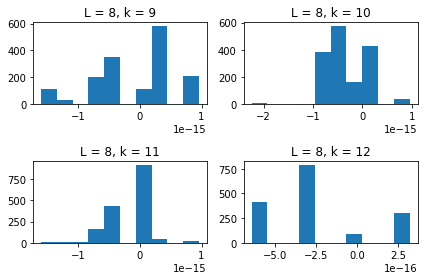

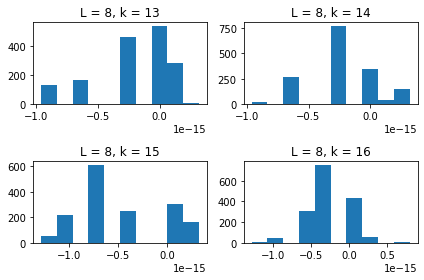

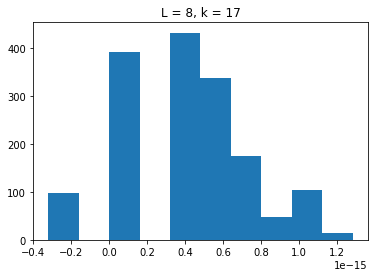

In [98]:
from math import ceil, floor
from matplotlib import pyplot as plt
L = 8
first_L = 4
max_k = 2 * L + 1

num_rows = 2
num_cols = 2
pictures_per_fig = num_rows * num_cols

number_of_complete_figures = floor(max_k / pictures_per_fig)

for i in range(number_of_complete_figures):
    fig, axes = plt.subplots(2,2)
    for j,ax in enumerate(axes.flatten()):
        k = i * pictures_per_fig + j
        ax.hist(results[L-first_L][k][1])
        ax.title.set_text("L = " + str(L)+ ", " + "k = " + str(k+1))
    
    plt.tight_layout()
    plt.savefig('complete_L_' + str(L) + "_" + str(i+1), dpi=300)
    plt.show()

remaining = max_k - number_of_complete_figures * pictures_per_fig

if remaining > 1:
    fig, new_axes = plt.subplots(nrows=1, ncols=remaining)
    for j,ax in enumerate(new_axes):
        k = number_of_complete_figures * pictures_per_fig + j
        ax.hist(results[L-first_L][k][1])
        ax.title.set_text("L = " + str(L)+ ", " + "k = " + str(k+1))

    plt.tight_layout()
    plt.savefig('complete_L_' + str(L) + "_" + str(i+2), dpi=300)
    plt.show()
else:
    k = max_k - 1
    plt.hist(results[L-first_L][k][1])
    plt.title("L = " + str(L)+ ", " + "k = " + str(k+1))
    plt.savefig('complete_L_' + str(L) + "_" + str(i + 2), dpi=300)
    plt.show()

## PARTIAL

160


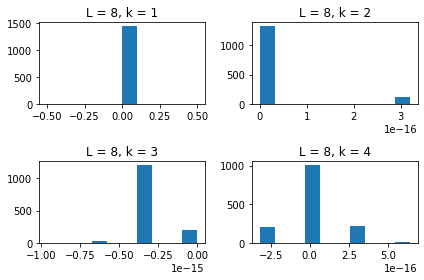

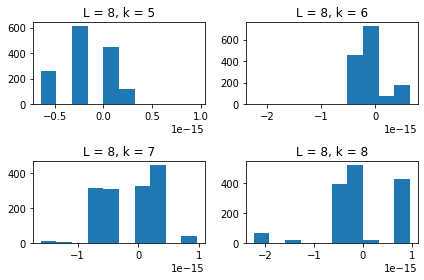

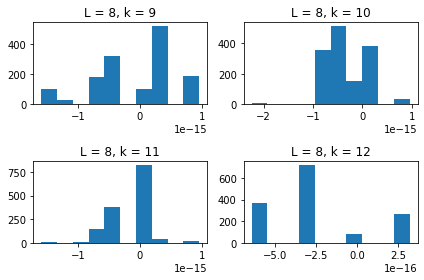

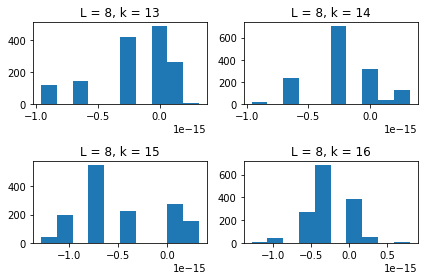

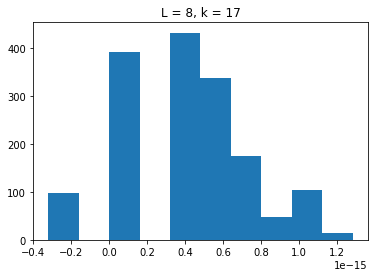

In [99]:
first_non_convergence = np.nonzero([not results[L-first_L][k][0][1] for k in range(0,max_k)])[0].tolist()

#if there is a k for which there is no convergence
if first_non_convergence:
    #number of histograms
    first_non_convergence = first_non_convergence[0]
    pictures = max_k - first_non_convergence
    number_of_complete_figures = floor(pictures / pictures_per_fig)
    partial_idx = maxiter[L-first_L] //10
    print(partial_idx)
    
    if number_of_complete_figures > 0:
        for i in range(number_of_complete_figures):
            fig, axes = plt.subplots(2,2)
            for j,ax in enumerate(axes.flatten()):
                k = first_non_convergence + i * pictures_per_fig + j
                ax.hist(results[L-first_L][k][1][:-partial_idx])
                ax.title.set_text("L = " + str(L)+ ", " + "k = " + str(k+1))

            plt.tight_layout()
            plt.savefig('partial_L_' + str(L) + "_" + str(i+1), dpi=300)
            plt.show()

    remaining = pictures - number_of_complete_figures * pictures_per_fig
    
    if remaining > 1:
        fig, new_axes = plt.subplots(nrows=1, ncols=remaining)
        for j,ax in enumerate(new_axes):
            k = first_non_convergence + number_of_complete_figures * pictures_per_fig + j
            ax.hist(results[L-first_L][k][1][:-partial_idx ])
            ax.title.set_text("L = " + str(L)+ ", " + "k = " + str(k+1))

        plt.tight_layout()
        plt.savefig('partial_L_' + str(L) + "_" + str(i+2), dpi=300)
        plt.show()
    else:
        k = max_k - 1
        plt.hist(results[L-first_L][k][1])
        plt.title("L = " + str(L)+ ", " + "k = " + str(k+1))
        plt.savefig('partial_L_' + str(L) + "_" + str(i + 2), dpi=300)
        plt.show()
else:    print("is empty")